<a href="https://colab.research.google.com/github/jm19465/CE888/blob/master/Lab_7/Exercise_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [3]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = keras.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 20s 977us/step - loss: 0.6459 - acc: 0.6058 - val_loss: 0.4851 - val_acc: 0.7832
Epoch 2/10
20000/20000 [==============================] - 19s 948us/step - loss: 0.

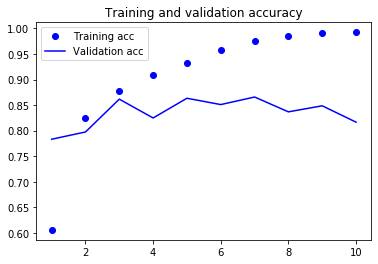

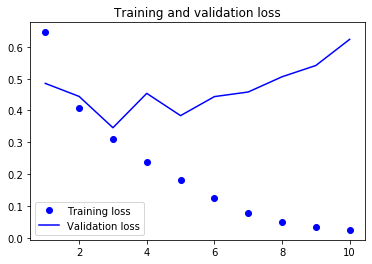

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from keras.layers import LSTM

model = keras.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.5069 - acc: 0.7475 - val_loss: 0.3422 - val_acc: 0.8582
Epoch 2/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2938 - acc: 0.8849 - val_loss: 0.3121 - val_acc: 0.8736
Epoch 3/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2315 - acc: 0.9130 - val_loss: 0.3366 - val_acc: 0.8580
Epoch 4/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1993 - acc: 0.9252 - val_loss: 0.4179 - val_acc: 0.8332
Epoch 5/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1728 - acc: 0.9358 - val_loss: 0.4101 - val_acc: 0.8604
Epoch 6/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1567 - acc: 0.9426 - val_loss: 0.3266 - val_acc: 0.8924
Epoch 7/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1443 - acc: 0.9483 - val_loss: 0.3306 - val_acc:

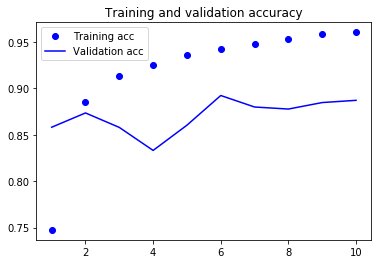

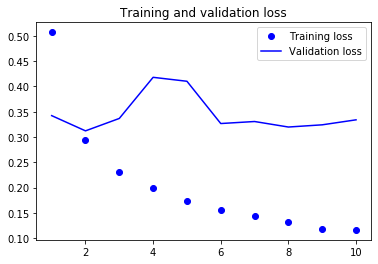

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()